# DS 2500 HW 6

Due: Fri Mar 24 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`

### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

| part                                        |    |
|:--------------------------------------------|---:|
| Part 1.1: Car weight & power                | 15 |
| Part 2: Polynomial Fitting                  | 35 |
| Part 3: Clustering States by Driving Habits | 15 |
| Part 4: PCA Iris                            | 15 |
| total                                       | 80 |

This HW is a bit shorter than most to allow you time to work on your projects :)

# Part 1.1: Car weight & power (15 points)
1. Given the data below, build and plot a `LinearRegression` model as shown immediately below:

<img src="https://i.ibb.co/W2X3BWb/horsepower-vs-weight.png" width=700>

Your output should be as aesthetically-good-looking and clear, but you needn't follow our color scheme / font sizes exactly.


In [1]:
import seaborn as sns

df_car = sns.load_dataset('mpg')
df_car.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

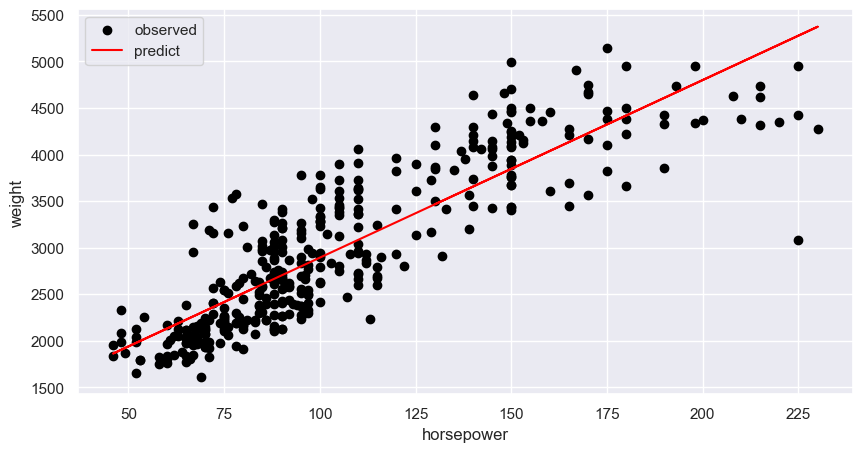

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_car = df_car.dropna()

#get x and y
x = df_car.loc[:, 'horsepower'].values
x = x.reshape(-1, 1)
y = df_car.loc[:, 'weight'].values

sns.set()

#plot data points
plt.scatter(x=x, y=y, c = 'black', label='observed')
plt.xlabel('horsepower')
plt.ylabel('weight')

#intitialize and fit regression
reg = LinearRegression()
reg.fit(x, y)

#linear prediciton
slope = reg.coef_[0]
intercept = reg.intercept_
y_pred = slope * x + intercept

#plot regression
plt.plot(x, y_pred, color='red', label='predict')

plt.gcf().set_size_inches(10, 5)
plt.legend()

# Part 1.2: Interpretting Regressions (20 points, 10 each)

Answer each of the questions below by
- writing a few lines of relevant python code in one or two code cells
- writing one or two clear, succinct sentence response in markdown just below

1. Compute and interpret a quantification of how good the model in part 1.1 is.  How helpful is horsepower in explaining differences in the weight of a car for this particular set of cars?
1. One car has 50 more horsepower than another.  Using the model from part 1.1, whats our best guess as to how much heavier the more powerful car is?

In [3]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y, y_pred=y_pred)
print(f'the models r2 is {r2:.2f}')

the models r2 is 0.75


75% of all the variance in weight can be explained by horsepower.

In [4]:
change_horsepower = 50
#find the weight difference by multiplying slope by the change in horsepower
change_weight = 50 * slope
change_weight

953.9080776348733

Using the regression model, we can guess that the more powerful car will be 953.9 units heavier.

# Part 2: Polynomial Fitting (35 points)

Identify the polynomial that `x, y` likely comes from.  Your response should be written out (may be done in markdown, not programmatically) as:

$$y = 1 + 2x + 3x^2$$
    
or similar.  Please round your coefficients to 2 decimal places so they're easily read.  Be sure to justify your chosen polynomial [degree](https://en.wikipedia.org/wiki/Degree_of_a_polynomial) with a graph and a sentence.

#### Hints:
- How do I pick a polynomial degree?
    - see "Preventing Overfitting" from day 17
    - a `plt.plot()` of degree vs cross validated r2 might be a helpful
    - “Everything should be made as simple as possible, but no simpler.” 
- there is an order to our x variables, the earlier entries are often lower
    - this feels like the chinstrap tragedy from day 13 ...
- after cross validation I'll have a bunch of models, which do I report in my final polynomial estimate?
    - none of these cross validated models are approrpiate

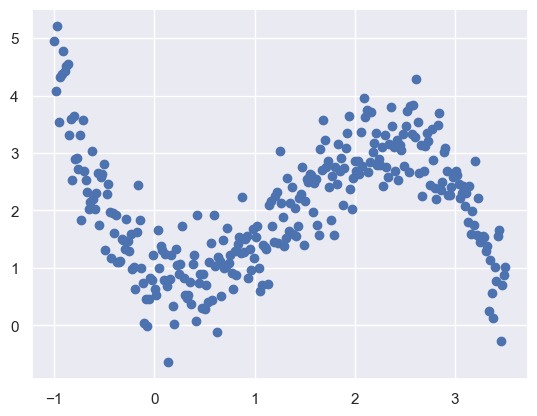

In [5]:
import pickle

# loads arrays x and y from file
with open('xy_hw6.p', 'rb') as f:
    x, y = pickle.load(f)
    
# # having trouble with the pickle file?  use the csv as a backup
# df = pd.read_csv('xy_hw6.csv')
# x = df['x'].values
# y = df['y'].values

plt.scatter(x, y);

In [6]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


def fit_plot_poly2(x, y, degree):
    """ fits and plots a polynomial of given degree
    
    Args:
        x (np.array): (n_samples, 1) array of x inputs
        y (np.array): (n_sample, 1) array of target values
        degree (int): max degree of polynomial
    """
    coef = [10, 10, -10, 1]
    
    # project x to polynomial
    poly_project = PolynomialFeatures(degree=degree)
    x_poly = poly_project.fit_transform(x)
    
    # fit via linear regression
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x_poly, y)
    
    # predict y values (line of polynomial)
    x_fine = np.linspace(x.min(), x.max(), 101).reshape(-1, 1)
    x_fine_poly = poly_project.fit_transform(x_fine)
    y_pred_fine = reg.predict(x_fine_poly)
    
    # compute r2
    y_pred = reg.predict(x_poly)
    kfold = KFold(n_splits=10, shuffle = True)
    
    
    #cross validate
    for train_idx, test_idx in kfold.split(x, y):
        # get training data
        x_train = x_poly[train_idx, :]
        y_train = y[train_idx]
    
        # get test data    
        x_test = x_poly[test_idx, :]
    
        # fit data
        reg = reg.fit(x_train, y_train)
    
        # estimate on test data
        y_pred[test_idx] = reg.predict(x_test)
    
    r2 = r2_score(y_true=y, y_pred=y_pred)
    
    # plot polynomial / observations
    plt.plot(x_fine, y_pred_fine, label=f'cross val r2={r2:.9f}', color='k', linewidth=2)
    plt.scatter(x, y, label='observed', color='r')
    plt.legend()  

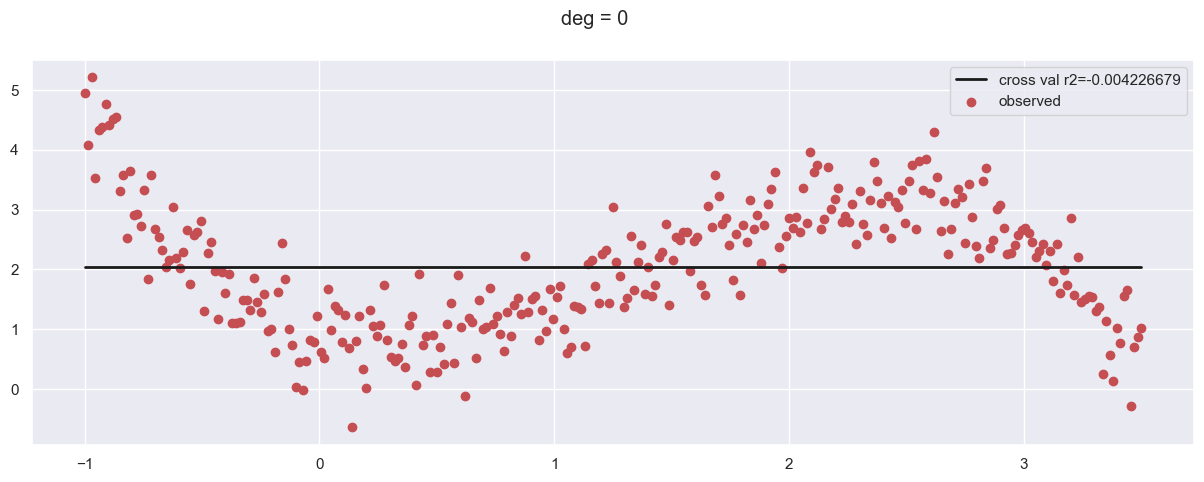

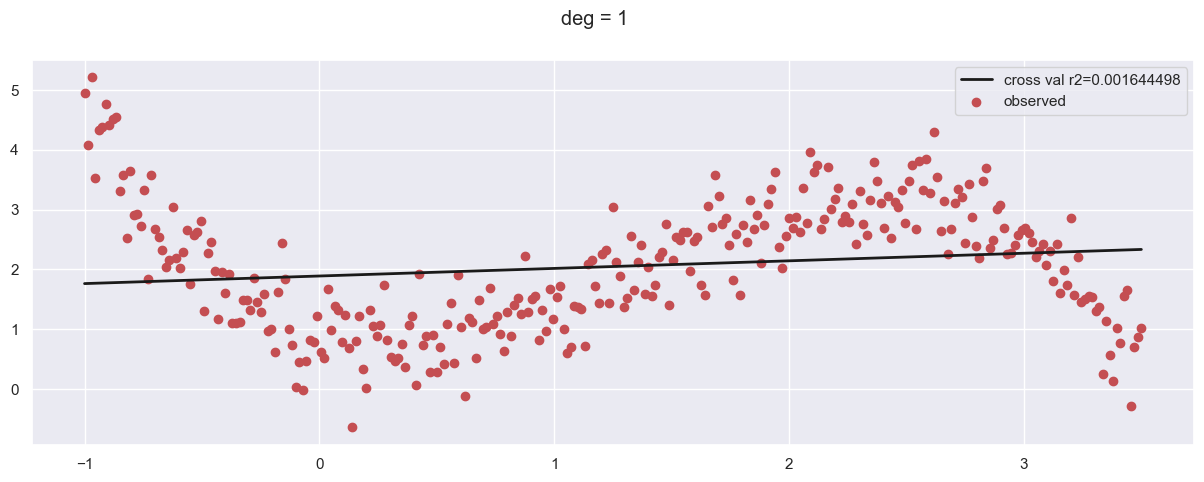

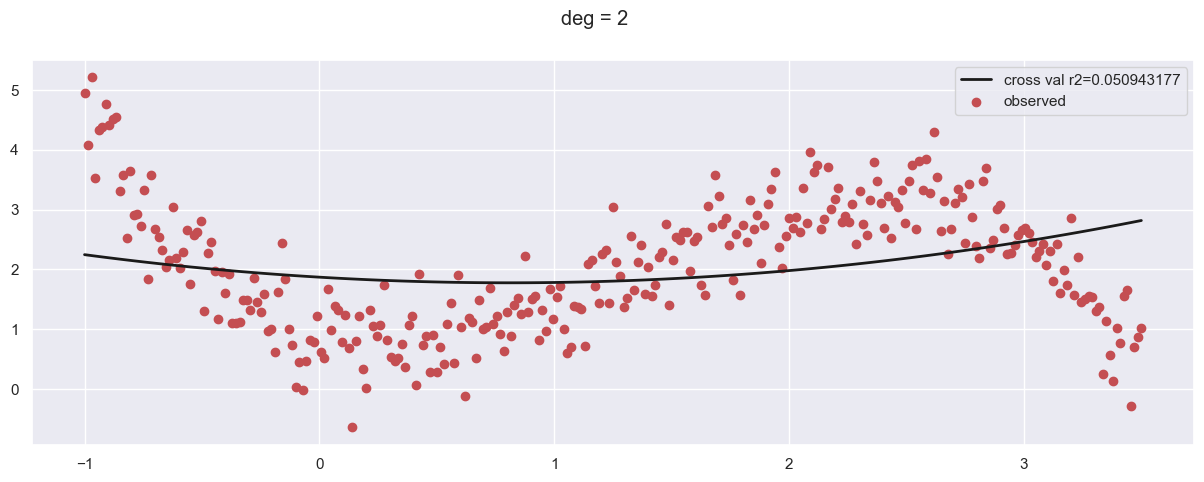

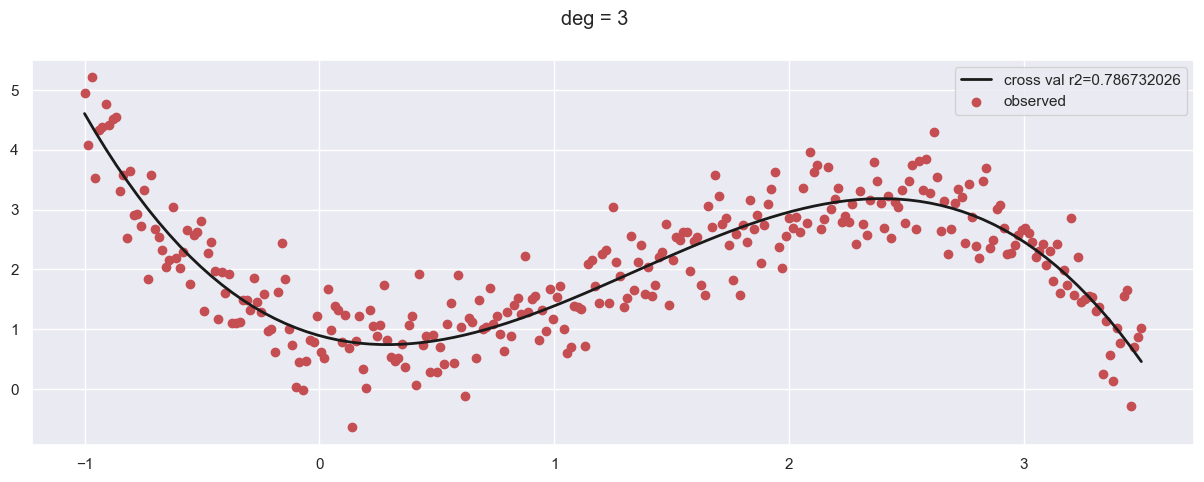

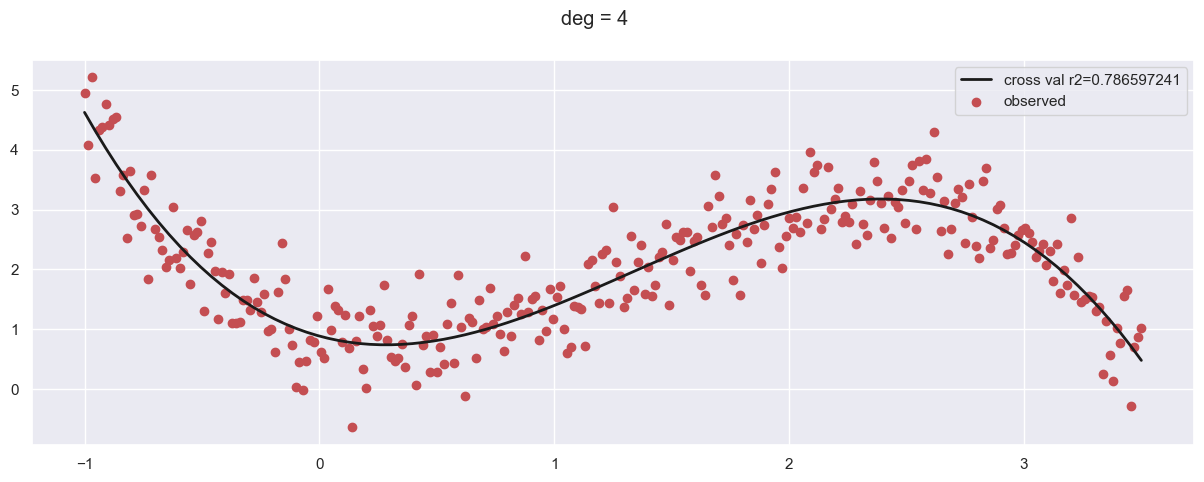

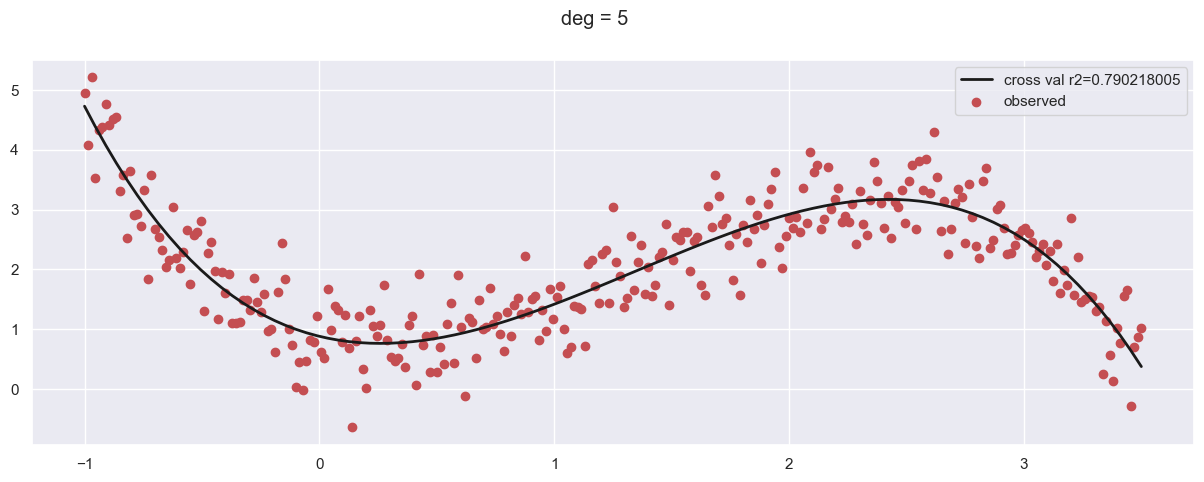

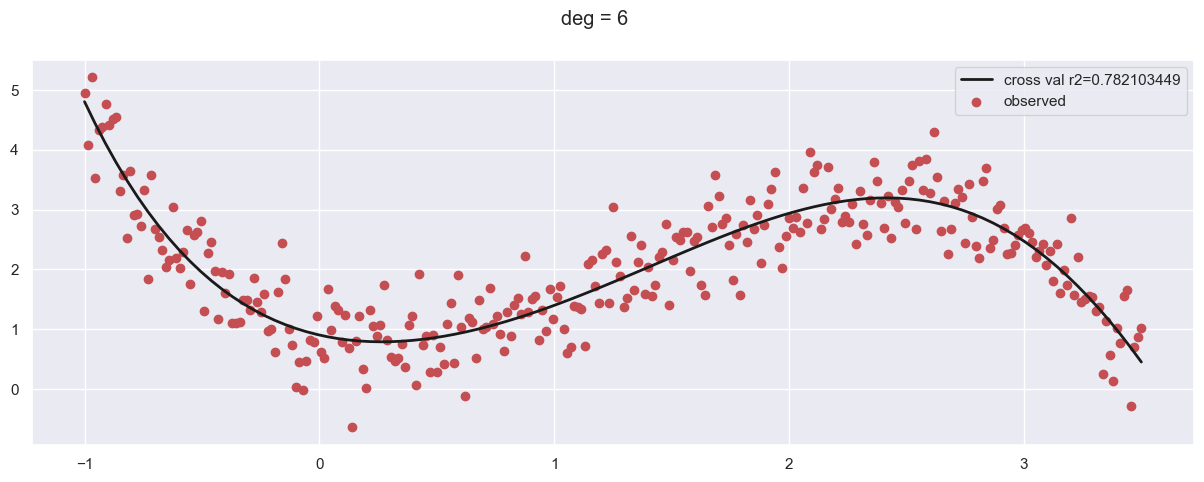

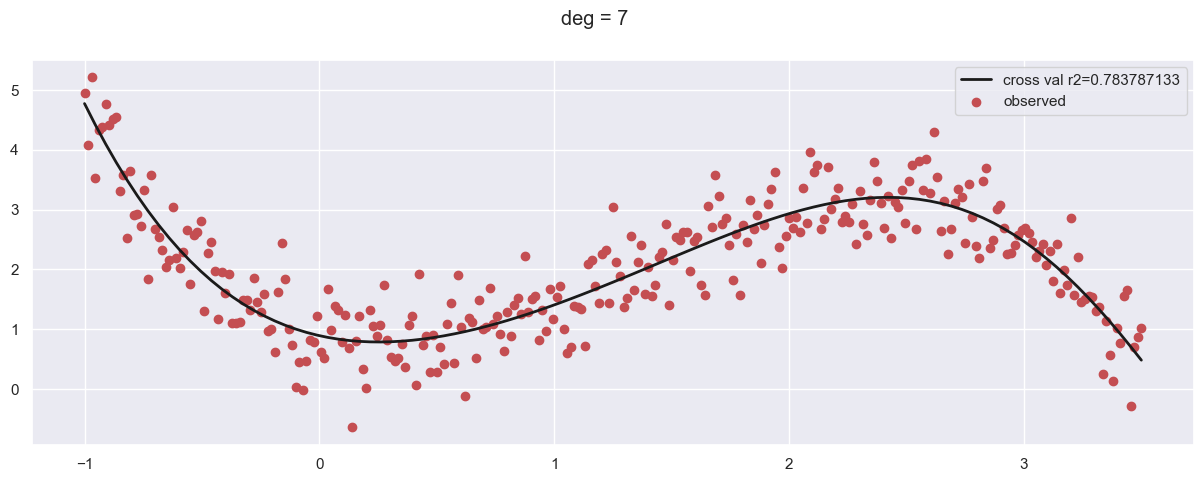

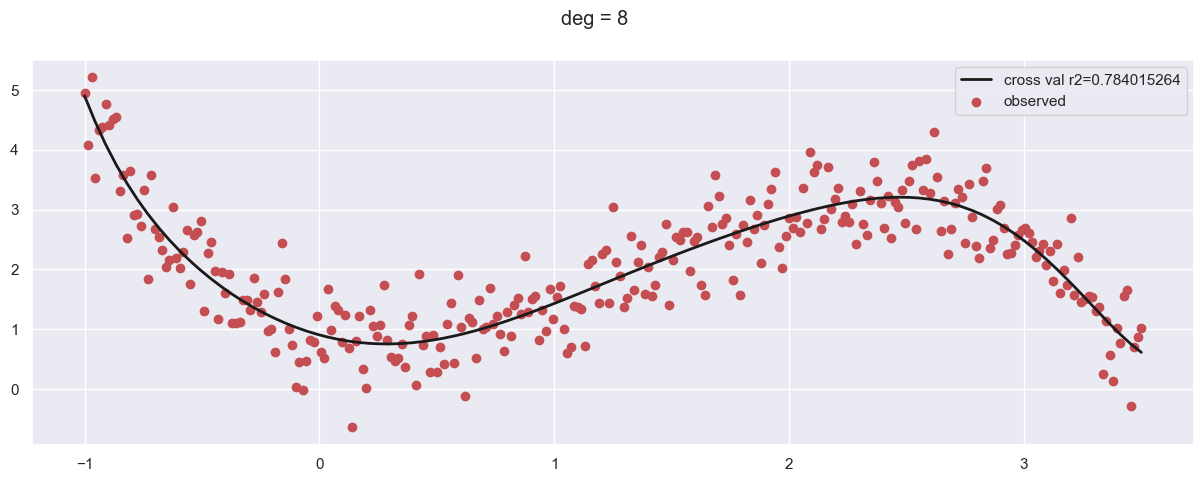

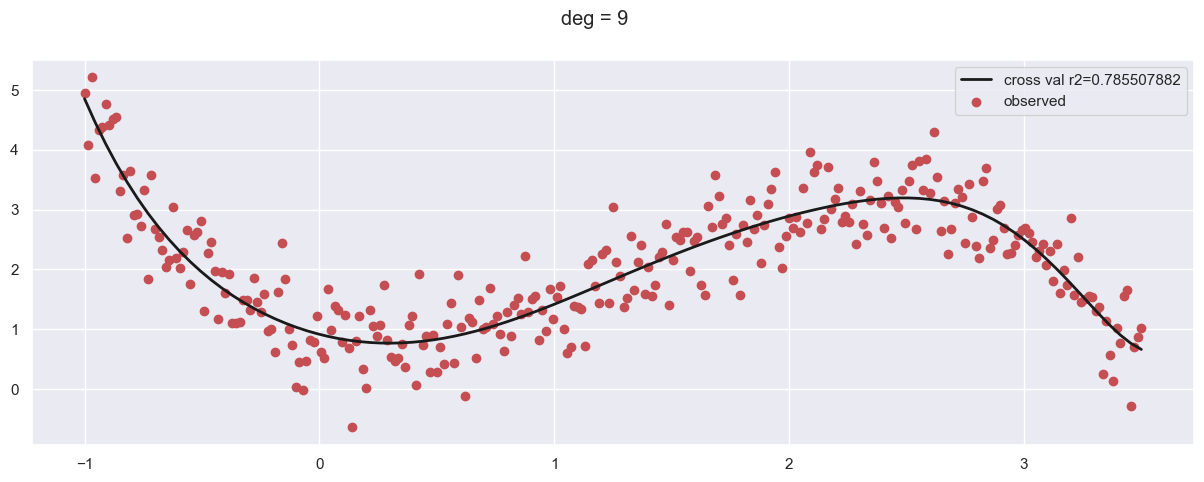

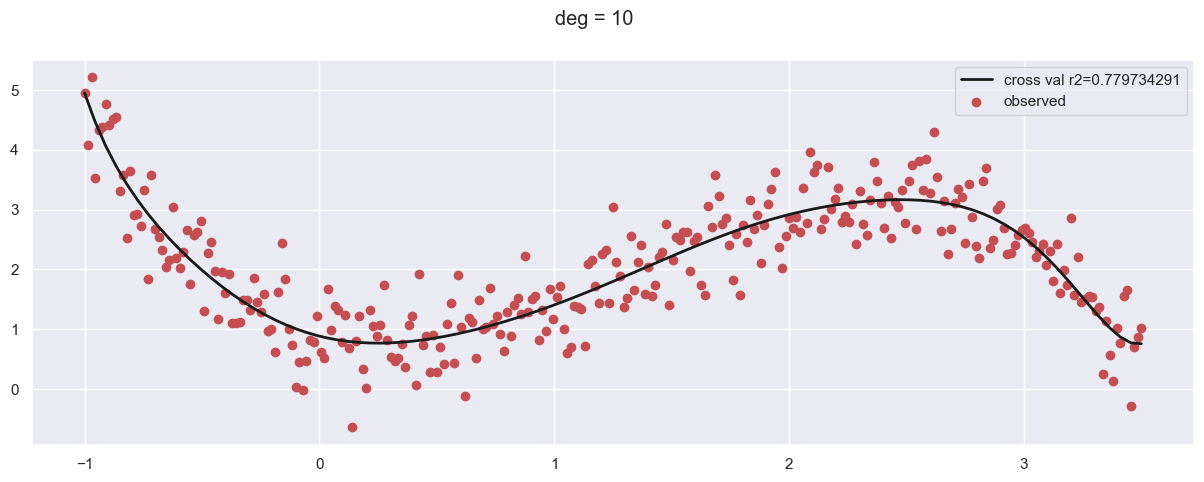

In [7]:
for degree in range(11):
    #get new plot for each figure
    plt.figure()

    fit_plot_poly2(x, y, degree)
    plt.suptitle(f'deg = {degree}')
    plt.gcf().set_size_inches(15, 5)

I chose degree 3 because it has the highest cross validated r2 score.

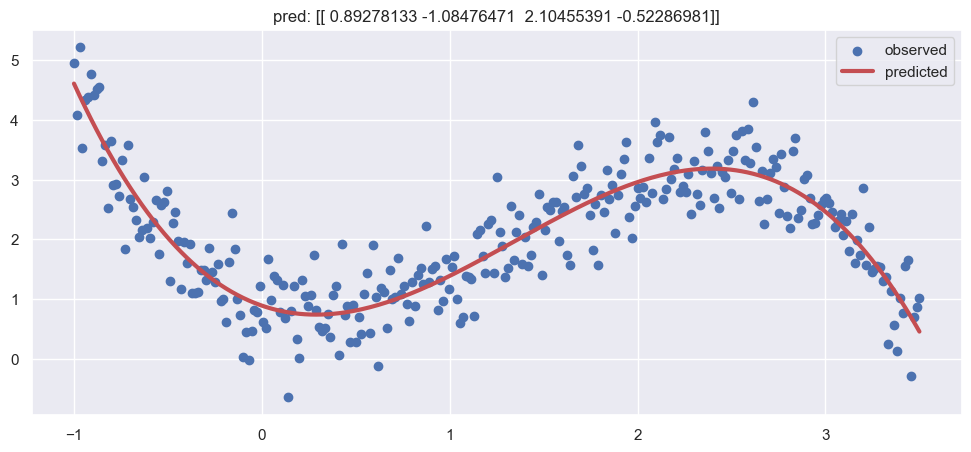

In [8]:
#find the coefficients of the function using degree 3

degree = 3

# process x to polynomial features
poly_feat = PolynomialFeatures(degree=degree)
x_poly = poly_feat.fit_transform(x)


# fit polynomial regression
reg = LinearRegression(fit_intercept=False)
reg.fit(x_poly, y)

# predict y (from regression)
y_pred = reg.predict(x_poly)

# plot
plt.scatter(x, y, label='observed')
plt.plot(x, y_pred, color='r', linewidth=3, label='predicted')

# collect coefficients
coef_pred = reg.coef_


plt.title(f'pred: {coef_pred}')

plt.legend()
plt.gcf().set_size_inches(12, 5)

Using degree of 3, I found the equation of the ploynomial regression to be: $$y = .89 - 1.08x + 2.10x^2 - .52x^3$$

# Part 3: Clustering States by Driving Habits  (15 points)

Use K-Means clustering to cluster all the states into k sub-groups so that each sub-group has similar car crash statistics.  
- Build a graph of how the mean distance from sample to centroid changes as k increases from two to seven.
- Write one or two sentences which give the number of sub-groups best suited for this data (i.e. find the "elbow").  
    - If no particular k seems much better than the others, characterize what about the graph leads you to this conclusion.

Hint:
- is this raw data, without any preprocessing steps applied, appropriate for clustering?
    - no

In [9]:
df_car = sns.load_dataset('car_crashes')
df_car.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

In [10]:
#normalize the data
x_feat_list = ['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses']
x = df_car.loc[:, x_feat_list].values

#scale normalization
x = x @ np.diag(1 / x.std(axis=0))

In [11]:
from sklearn.cluster import KMeans

# keys are k (number of clusters), values are mean_d (mean distance
# from each sample to its cluster centroid)
mean_d_dict = dict()
for n_clusters in range(2, 8):
    # fit kmeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)    
        
    # compute & store mean distance
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d


C:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

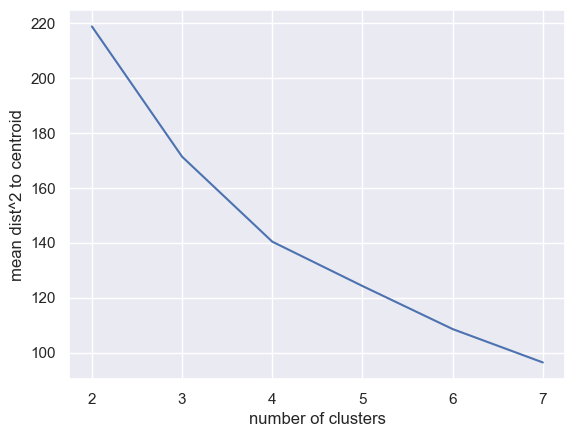

In [12]:
#plot the mean values to centroid for each number k for k-clusters
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('number of clusters')
plt.ylabel('mean dist^2 to centroid');

There is no k that is obviously much better than the others as the graph does not have any clear "elbows" and is instead farily linear. If it was necessary to choose a k, though, k=4 is probably the best as in the graph there is a slight elbow at 4, and it is a good balance between simple and a small mean distance.

# Part 4: PCA Iris (15 points)
Build the following "Principal Component Map" from all four features in the iris dataset below.  

<img src='https://i.ibb.co/2Ktt1Xm/iris-pca.png' width=800px>

You're welcome to submit a `matplotlib` scatter for full credit, but you may find the interactive `plotly` graph more fun to work with.  You can install plotly with `pip3 install plotly` or similar and build the necessary scatter plot with:
```python
import plotly.express as px

fig = px.scatter(df_iris, x='pca0', y='pca1', hover_data=df_iris.columns, color='species')
fig.show()

# if you want to export to html (not needed for HW at all, just good to know!)
fig.write_html('iris_pca.html')
```

In [13]:
df_iris = sns.load_dataset('iris')

df_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [14]:
from sklearn.decomposition import PCA
import plotly.express as px

x_feat_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# discard rows with missing data
df_iris.dropna()

# extract relevant x values
x = df_iris.loc[:, x_feat_list].values

# compress
pca = PCA(n_components=2, whiten=False)
x_compress = pca.fit_transform(x)

# add features back into dataframe (for plotting)
df_iris['pca0'] = x_compress[:, 0]
df_iris['pca1'] = x_compress[:, 1]

# scatter plot
fig = px.scatter(df_iris, x='pca0', y='pca1', hover_data=df_iris.columns, color='species')
fig.show()

In [15]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'pca0', 'pca1'],
      dtype='object')